## Mid-Term task

Welcome to your Mid-Term task.
<br/> You have 4 tasks to complete this assignment:
<br/> 1. Perform Data Exploration
<br/> 2. Perform Feature Engineering 
<br/> 3. Choose a model of classifier and explain your choice 
<br/> 4. Train your model and use it to classify test dataset
<br/> 5. Measure your results

The data you have to deal with is about - well logs (каротаж, разновидность геофизических исследований скважин)

### Importing basic packages, add your needed ones if necessary

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

### Load training data

In [2]:
df = pd.read_csv('train_new.csv', sep=';')
df_test = pd.read_csv('test_new.csv', sep=';')

The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate 
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:
<br/>
30000: Sandstone<br/>
65030: Sandstone/Shale<br/>
65000: Shale<br/>
80000: Marl<br/>
74000: Dolomite<br/>
70000: Limestone<br/>
70032: Chalk<br/>
88000: Halite<br/>
86000: Anhydrite<br/>
99000: Tuff<br/>
90000: Coal<br/>
93000: Basement<br/>

In [3]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289999 entries, 0 to 289998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               289999 non-null  object 
 1   DEPTH_MD                           289999 non-null  float64
 2   X_LOC                              282606 non-null  float64
 3   Y_LOC                              282606 non-null  float64
 4   Z_LOC                              282606 non-null  float64
 5   GROUP                              289999 non-null  object 
 6   FORMATION                          245931 non-null  object 
 7   CALI                               289532 non-null  float64
 8   RSHA                               184722 non-null  float64
 9   RMED                               273724 non-null  float64
 10  RDEP                               282606 non-null  float64
 11  RHOB                               2571

In [5]:
df.isnull().sum()

WELL                                      0
DEPTH_MD                                  0
X_LOC                                  7393
Y_LOC                                  7393
Z_LOC                                  7393
GROUP                                     0
FORMATION                             44068
CALI                                    467
RSHA                                 105277
RMED                                  16275
RDEP                                   7393
RHOB                                  32896
GR                                        0
SGR                                  272649
NPHI                                  95318
PEF                                   98065
DTC                                    4236
SP                                    66285
BS                                    85026
ROP                                   54968
DTS                                  272906
DCAL                                 166180
DRHO                            

In [6]:
df.isnull().mean()*100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 2.549319
Y_LOC                                 2.549319
Z_LOC                                 2.549319
GROUP                                 0.000000
FORMATION                            15.195914
CALI                                  0.161035
RSHA                                 36.302539
RMED                                  5.612088
RDEP                                  2.549319
RHOB                                 11.343487
GR                                    0.000000
SGR                                  94.017221
NPHI                                 32.868389
PEF                                  33.815634
DTC                                   1.460695
SP                                   22.856975
BS                                   29.319411
ROP                                  18.954548
DTS                                  94.105842
DCAL         

In [7]:
df['FORCE_2020_LITHOFACIES_CONFIDENCE'].value_counts(normalize=True)*100

1.0    83.713255
2.0    13.664768
3.0     2.621977
Name: FORCE_2020_LITHOFACIES_CONFIDENCE, dtype: float64

In [8]:
df['FORCE_2020_LITHOFACIES_CONFIDENCE'].fillna(value = 1 , inplace= True)

In [9]:
df['FORMATION'] = df['FORMATION'].fillna(df.FORMATION.mode())
df = pd.concat([df,pd.get_dummies(df['GROUP'], prefix='group', dtype='int')],axis=1)
df = pd.concat([df,pd.get_dummies(df['WELL'], prefix='well', dtype='int')],axis=1)
df = pd.concat([df,pd.get_dummies(df['FORMATION'], prefix='formation', dtype='int')],axis=1)
df.drop(['GROUP', 'FORMATION', 'WELL'],axis=1, inplace=True)

In [10]:
df.isnull().mean()*100

DEPTH_MD                0.000000
X_LOC                   2.549319
Y_LOC                   2.549319
Z_LOC                   2.549319
CALI                    0.161035
                          ...   
formation_Tuxen Fm.     0.000000
formation_Ty Fm.        0.000000
formation_Ula Fm.       0.000000
formation_Utsira Fm.    0.000000
formation_Vaale Fm.     0.000000
Length: 113, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289999 entries, 0 to 289998
Columns: 113 entries, DEPTH_MD to formation_Vaale Fm.
dtypes: float64(25), int32(87), int64(1)
memory usage: 153.8 MB


In [12]:
df['RMIC'].value_counts()

2.763253    1
2.444525    1
1.716061    1
3.521692    1
4.294596    1
           ..
2.685180    1
1.264879    1
3.191694    1
3.197187    1
2.457382    1
Name: RMIC, Length: 4638, dtype: int64

In [13]:
df['ROPA'].value_counts()

41.759998    6
7.830000     6
27.900000    6
28.129999    6
8.240000     6
            ..
19.528412    1
19.214062    1
12.921940    1
22.725182    1
30.355658    1
Name: ROPA, Length: 25576, dtype: int64

In [14]:
df['RXO'].value_counts()

-999.900024     4583
 2000.000000     201
 15.648000       127
 0.170000        123
 0.543000         14
                ... 
 0.788792          1
 0.868150          1
 20.402805         1
 2.442251          1
 3.561716          1
Name: RXO, Length: 43277, dtype: int64

In [15]:
df['DTS'].value_counts()

192.460907    3
188.856506    3
224.440475    2
177.562180    2
187.743210    2
             ..
152.429230    1
160.083908    1
244.684341    1
188.641205    1
200.155869    1
Name: DTS, Length: 17065, dtype: int64

In [16]:
df['SGR'].value_counts()

-196.869995    7
 72.703247     2
 67.860397     2
 55.102711     2
 69.538139     2
              ..
 73.409058     1
 110.440102    1
 70.638184     1
 53.299191     1
 44.353111     1
Name: SGR, Length: 17329, dtype: int64

In [17]:
df['DCAL'].value_counts()

 1.500000    917
-0.093800    880
 0.832000    589
 0.356000    577
 0.453000    573
            ... 
 1.524977      1
 1.915088      1
 0.821444      1
 0.516993      1
 5.566959      1
Name: DCAL, Length: 107753, dtype: int64

In [18]:
df = df.drop('SGR', axis = 1)
df = df.drop('DTS', axis = 1)
df = df.drop('RXO', axis = 1)
df = df.drop('ROPA', axis = 1)
df = df.drop('RMIC', axis = 1)
df = df.drop('DCAL', axis = 1)

In [19]:
df.isnull().mean()*100

DEPTH_MD                0.000000
X_LOC                   2.549319
Y_LOC                   2.549319
Z_LOC                   2.549319
CALI                    0.161035
                          ...   
formation_Tuxen Fm.     0.000000
formation_Ty Fm.        0.000000
formation_Ula Fm.       0.000000
formation_Utsira Fm.    0.000000
formation_Vaale Fm.     0.000000
Length: 107, dtype: float64

In [20]:
df['X_LOC'] = df['X_LOC'].fillna(df.X_LOC.median())
df['Y_LOC'] = df['Y_LOC'].fillna(df.Y_LOC.median())
df['Z_LOC'] = df['Z_LOC'].fillna(df.Z_LOC.median())
df['CALI'] = df['CALI'].fillna(df.CALI.median())
df['RSHA'] = df['RSHA'].fillna(df.RSHA.median())
df['RMED'] = df['RMED'].fillna(df.RMED.median())
df['RDEP'] = df['RDEP'].fillna(df.RDEP.median())
df['RHOB'] = df['RHOB'].fillna(df.RHOB.median())
df['NPHI'] = df['NPHI'].fillna(df.NPHI.median())
df['PEF'] = df['PEF'].fillna(df.PEF.median())
df['DTC'] = df['DTC'].fillna(df.DTC.median())
df['SP'] = df['SP'].fillna(df.SP.median())
df['BS'] = df['BS'].fillna(df.BS.median())
df['ROP'] = df['ROP'].fillna(df.ROP.median())
df['DRHO'] = df['DRHO'].fillna(df.DRHO.median())
df['MUDWEIGHT'] = df['MUDWEIGHT'].fillna(df.MUDWEIGHT.median())

In [21]:
df.isnull().sum()

DEPTH_MD                0
X_LOC                   0
Y_LOC                   0
Z_LOC                   0
CALI                    0
                       ..
formation_Tuxen Fm.     0
formation_Ty Fm.        0
formation_Ula Fm.       0
formation_Utsira Fm.    0
formation_Vaale Fm.     0
Length: 107, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289999 entries, 0 to 289998
Columns: 107 entries, DEPTH_MD to formation_Vaale Fm.
dtypes: float64(19), int32(87), int64(1)
memory usage: 140.5 MB


### Preprocessing completed
I have removed all columns with high amount of <b>Nan</b> values and if I still tried to recover values it will not be accurate because there were too many <b>unique values</b> above non-Nan values left.

In [23]:
X, y = df.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1).values, df.FORCE_2020_LITHOFACIES_LITHOLOGY.values

In [24]:
print(X.shape)
print(y.shape)

(289999, 105)
(289999,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231999, 105), (58000, 105), (231999,), (58000,))

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(random_state=42)

In [28]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
y_preds_dtc = dtc.predict(X_test)

In [30]:
y_preds_dtc_series = pd.Series(y_preds_dtc)

In [31]:
y_preds_dtc_series.value_counts()

65000    34272
30000     8673
70000     4779
65030     3092
80000     2614
70032     1718
88000     1677
99000      663
86000      223
90000      145
74000      121
93000       23
dtype: int64

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_dtc))

              precision    recall  f1-score   support

       30000       0.94      0.94      0.94      8707
       65000       0.97      0.97      0.97     34197
       65030       0.80      0.79      0.80      3111
       70000       0.91      0.91      0.91      4745
       70032       0.96      0.96      0.96      1721
       74000       0.72      0.65      0.68       134
       80000       0.91      0.90      0.91      2628
       86000       0.92      0.94      0.93       219
       88000       0.99      0.99      0.99      1676
       90000       0.84      0.78      0.81       157
       93000       1.00      0.92      0.96        25
       99000       0.94      0.92      0.93       680

    accuracy                           0.95     58000
   macro avg       0.91      0.89      0.90     58000
weighted avg       0.95      0.95      0.95     58000



In [33]:
dtc.score(X_test, y_test)

0.9472413793103448

Feature: 0, Score: 6.18236
Feature: 1, Score: 3.59332
Feature: 2, Score: 2.31850
Feature: 3, Score: 4.30258
Feature: 4, Score: 2.29285
Feature: 5, Score: 1.07833
Feature: 6, Score: 2.39073
Feature: 7, Score: 1.85899
Feature: 8, Score: 2.92619
Feature: 9, Score: 26.44343
Feature: 10, Score: 6.09414
Feature: 11, Score: 0.93138
Feature: 12, Score: 3.46704
Feature: 13, Score: 3.20926
Feature: 14, Score: 0.42176
Feature: 15, Score: 1.80070
Feature: 16, Score: 1.18839
Feature: 17, Score: 3.79847
Feature: 18, Score: 0.00258
Feature: 19, Score: 2.57911
Feature: 20, Score: 0.01780
Feature: 21, Score: 0.01388
Feature: 22, Score: 1.57825
Feature: 23, Score: 0.00779
Feature: 24, Score: 0.21656
Feature: 25, Score: 0.72655
Feature: 26, Score: 8.61711
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.02154
Feature: 29, Score: 0.04603
Feature: 30, Score: 5.11838
Feature: 31, Score: 0.31858
Feature: 32, Score: 0.00899
Feature: 33, Score: 0.01245
Feature: 34, Score: 0.04706
Feature: 35, Score: 0.00271
F

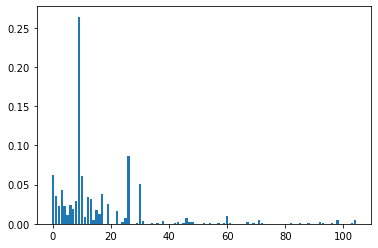

In [34]:
feat_imp = dtc.feature_importances_

for i,v in enumerate(feat_imp):
    print('Feature: %0d, Score: %.5f' % (i,v*100))
plt.bar([x for x in range(len(feat_imp))], feat_imp)
plt.show()

Ideally, I have to remove all features with too low score, but I have no time for it.

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,])
auc_score = roc_auc_score(y_test, dtc.predict_proba(X_test)[:,9])
plt.title('ROC AUC: {:.2f}%'.format(auc_score*100))

plt.plot(fpr, tpr, color='purple')
plt.plot([0, 1], [0, 1],color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

ValueError: multiclass format is not supported

I tried to build ROC curve but it does not support multiclass.

In [37]:
print('DecitionTree\n')
print(classification_report(y_test, y_preds_dtc))

DecitionTree

              precision    recall  f1-score   support

       30000       0.94      0.94      0.94      8707
       65000       0.97      0.97      0.97     34197
       65030       0.80      0.79      0.80      3111
       70000       0.91      0.91      0.91      4745
       70032       0.96      0.96      0.96      1721
       74000       0.72      0.65      0.68       134
       80000       0.91      0.90      0.91      2628
       86000       0.92      0.94      0.93       219
       88000       0.99      0.99      0.99      1676
       90000       0.84      0.78      0.81       157
       93000       1.00      0.92      0.96        25
       99000       0.94      0.92      0.93       680

    accuracy                           0.95     58000
   macro avg       0.91      0.89      0.90     58000
weighted avg       0.95      0.95      0.95     58000



### Conclusion
Decision tree allows us to process all possible outcomes and makes a comprehensive analysis of the consequences along each branch. It also doe not require a lot of data preprocessing. It showed us accuracy of 95% which is pretty high.